In [1]:
import ssl
# For data loading and manipulation
from sklearn.datasets import fetch_openml
import numpy as np

# For building and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluation and visualization
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
mnist = fetch_openml("mnist_784",version=1,as_frame=False, parser='auto')
X,y = mnist.data, mnist.target
print("Dataset Loaded successfully!")

Dataset Loaded successfully!


In [4]:
print(X)
print(type(X))
print("Shape of X", X.shape)

print("-------------------------------------------------")

print(y)
print(type(y))
print("Shape of X", y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
Shape of X (70000, 784)
-------------------------------------------------
['5' '0' '4' ... '4' '5' '6']
<class 'numpy.ndarray'>
Shape of X (70000,)


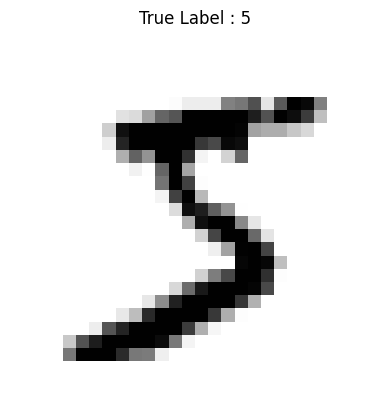

In [5]:
#let's visualize a single digit.
some_digit_index = 0
some_digit_image = X[some_digit_index].reshape(28,28)
true_label = y[some_digit_index]

plt.imshow(some_digit_image,cmap="binary")
plt.title(f"True Label : {true_label}")
plt.axis("off")
plt.show()

In [6]:
#1. Split the data (60,000 for training, 10,000 for testing)
X_train, X_test , y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

#2. Scale the pixel values to be between 0 and 1
#This improves performance for many algorithms

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

print("Data has been split and scaled")
print("Training set size : ", len(X_train_scaled))
print("Testing set size : ",len(X_test_scaled))

Data has been split and scaled
Training set size :  60000
Testing set size :  10000


In [7]:
#Create the Softmax Regression model
#The 'lbfgs" solver is a good choice for this problem
softmax_rep = LogisticRegression(multi_class="multinomial",solver='lbfgs', max_iter=1000, random_state=42)

#Train the model on the scaled training data
print("Treaining the model .....(This may take a while)")
softmax_rep.fit(X_train_scaled,y_train)
print("Training Complete ✅")

Treaining the model .....(This may take a while)


c:\Users\lapcity\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Complete ✅


In [9]:
#Make predictions on the test set
y_pred = softmax_rep.predict(X_test_scaled)

#Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on Test set : {accuracy:.4f}")

Model accuracy on Test set : 0.9257



 Displaying confusion matrix
ax: Axes(0.125,0.11;0.775x0.77)


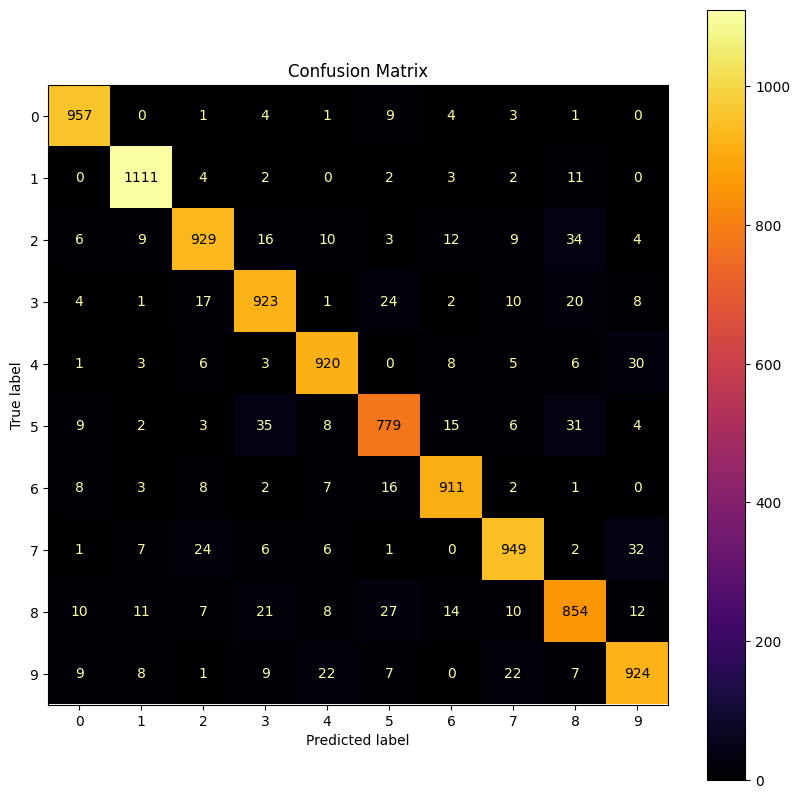

In [11]:
#Display thee confusion matrix to see where the model made mistakes
print("\n Displaying confusion matrix")
fig,ax = plt.subplots(figsize=(10,10))
print("ax:",ax)
ConfusionMatrixDisplay.from_estimator(softmax_rep, X_test_scaled, y_test, ax=ax ,cmap="inferno")
plt.title("Confusion Matrix")
plt.show()
